<center>
In God We Trust
</center>

# CE417: Artificial Intelligence

Dr. Mahdiyeh Soleymani Baghshah, Associate Professor

Computer Engineering Department,
Sharif University of Technology,
Tehran, Tehran, Iran


# Comment Classification (25 Points)

Corresponding TA: Aryan Ahadinia

In online retail stores, like digikala, people can leave comments on products and share their opinion. It's important to make sure that comment don't violet regulations so these website employ some people as comment reviewer to review comments one by and accept or reject comments. In this problem, we want to develop ML models to do comment reviewing task.


In [ ]:
# You are denied to add any other packages.

import numpy as np
import pandas as pd

from tqdm import tqdm


## Data (1 Point)

We want to work on data obtained from digikala. First, load train and test data separately. Then split train data into train data and validation data.


In [ ]:
#############################################
#### Load Train and Test Data, CODE HERE ####
#############################################
data_folder=''

#Comment the below code when running local
from google.colab import drive
drive.mount('/content/drive')
data_folder='drive/MyDrive/'

train_data=pd.read_csv(f'{data_folder}data/train.csv')[['comment','verification_status']]
test_data_ids=pd.read_csv(f'{data_folder}data/test.csv')['id']
test_data=pd.read_csv(f'{data_folder}data/test.csv')[['comment']]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
####################################################
#### Split into train and validation, CODE HERE ####
####################################################
validation_size=0.1
validation_indices=np.random.choice(len(train_data),int(len(train_data)*validation_size),replace=False)
validation_data=train_data.iloc[validation_indices]
train_data=train_data.drop(validation_indices,axis=0)

In [ ]:
###############################
####### Show Train Data #######
###############################
print(train_data.head())
print(f'train data size: {train_data.shape}')
print(f'validation data size: {validation_data.shape}')

                                             comment  verification_status
0                  خیلی دیر شارژ میشه. من پس فرستادم                    0
1  اول قرار بود بخاری برقی یا فن هیتر بخریم ولی چ...                    0
2  یک هفته پیش خریدم. یکی از دوستانم که کافی شاپ ...                    0
3  سلام . شاید تکنولوژی ar جدید و خوب باشد اما تو...                    0
4                       موزها تازه و قیمتم مناسب بود                    0
train data size: (144000, 2)
validation data size: (16000, 2)


In [ ]:
###############################
####### Show Test Data ########
###############################
print(test_data.head())
print(f'test data shape: {test_data.shape}')

                                             comment
0  جنس تاریخ گذشته بود.حدود دو هفته می گذشت از ان...
1  من این محصول را امروز از دیجی کالا تحویل گرفتم...
2  اصلا خوب نیست، فقط در این حد خوبه که گوشی خامو...
3             کلا دو بار استفاده کردم بدنه مخزن شکست
4  فقط برای لباسشویی خوب است و در ظرفشویی بعد از ...
test data shape: (20000, 1)


## Data Cleaning (5 Points)

One of the most important steps im ML task is data cleaning. Data cleaning, generally, aim to transform data in a known domain in which is appropriate for the task. In this section, we explore some data cleaning techniques on text data. There are several libraries for text processing in persian like `hazm` and `parsi.io`. In this section, you can use these libraries.


### Normalizations (1 Point)

It is possible to have multiple form for a character or a word. For example some of characters like ک or ی in persian, has different encoding. In persian, the other problem is zero-width non joiner (ZWNJ) which may cause different written form of same words.

Apply a text normalization on your data.


In [ ]:
!pip install hazm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
###################################
#### Normalizations, CODE HERE ####
###################################
from hazm import Normalizer
normalizer=Normalizer()
for data in tqdm([train_data, test_data,validation_data]):
  data['comment']=data['comment'].apply(lambda x:normalizer.normalize(x) if type(x)==str else float('nan'))

100%|██████████| 3/3 [00:22<00:00,  7.54s/it]


### Stemming/Lemmatisation (2 Points)

In many languages, like persian, arabic, and english, many words have a same root. Stemming and Lemmatisation are methods to transform all words is a family to a single form. In stemming we aim to find a common form for all word. It is not necessary to find the root as the common form. Moreover, it is possible to find the common form as a meaningless word. In lemmatisation we aim to find the root as the common form.

Apply both Stemming and Lemmatisation on data. In following cells, you can choose to use which of the outputs at your own discretion.


In [ ]:
###################################
####### Stemming, CODE HERE #######
###################################
from hazm import Stemmer
from hazm import WordTokenizer
stemmer=Stemmer()
tokenizer=WordTokenizer()
for data in tqdm([train_data, test_data,validation_data]):
  data['comment']=data['comment'].apply(lambda x:' '.join([stemmer.stem(y) for y in tokenizer.tokenize(x)]) if type(x)==str else float('nan'))

100%|██████████| 3/3 [00:24<00:00,  8.21s/it]


In [ ]:
###################################
#### Lemmatisation, CODE HERE #####
###################################
from hazm import Lemmatizer
lemmatizer=Lemmatizer()
for data in tqdm([train_data, test_data,validation_data]):
  data['comment']=data['comment'].apply(lambda x:' '.join([lemmatizer.lemmatize(y) for y in tokenizer.tokenize(x)]) if type(x)==str else float('nan'))

100%|██████████| 3/3 [00:12<00:00,  4.10s/it]


### Stop Words / Punctuations Removal (2 Points)

In all languages, including Persian, there are very frequent words, including conjunctions, prepositions, and documentary verbs, which do not carry much meaning. Also, in normal natural language processing tasks, punctuation marks such as periods and commas are removed to clean the data.

Remove stop words and punctuations in following cells.


In [ ]:
############################################
####### Stop Word Removal, CODE HERE #######
############################################
from hazm import stopwords_list
stp_list=stopwords_list()
for data in tqdm([train_data, test_data,validation_data]):
  data['comment']=data['comment'].apply(lambda x:' '.join(list(filter(lambda x:x not in stp_list,tokenizer.tokenize(x)))) if type(x)==str else float('nan'))

100%|██████████| 3/3 [00:28<00:00,  9.53s/it]


In [ ]:
############################################
###### Punctuations Removal, CODE HERE #####
############################################

punc_list=['.','،',':','!','؟',')','(']
for data in tqdm([train_data, test_data,validation_data]):
  data['comment']=data['comment'].apply(lambda x:' '.join(list(filter(lambda x:x not in punc_list,tokenizer.tokenize(x)))) if type(x)==str else float('nan'))

100%|██████████| 3/3 [00:04<00:00,  1.64s/it]


In [ ]:
X_train=train_data['comment'].apply(lambda x: tokenizer.tokenize(x) if type(x)==str else float('nan'))
y_train=np.array(train_data['verification_status'])


X_validation=validation_data['comment'].apply(lambda x: tokenizer.tokenize(x) if type(x)==str else float('nan'))
y_validation=np.array(validation_data['verification_status'])

X_test=test_data['comment'].apply(lambda x:tokenizer.tokenize(x) if type(x) ==str else float('nan'))

## Naive Bayes (5 Points)

In this part, we want to implement a naive bayes classifier with assumption of independent distribution between features, which are tokens in our problem.


In [ ]:
class NaiveBayes:
    def __init__(self):
      self.words_frequency_dict=dict()
      self.p_y=dict()
  
    def fit(self, X, y):
        ##################################
        ######### YOUR CODE HERE #########
        ##################################
        #X is a Series of comments and y is the verification status
        y=np.array(y)
        self.p_y[0]=sum(y==0)/len(y)
        self.p_y[1]=sum(y==1)/len(y)
        for i,comment in tqdm(enumerate(X)):
          if type(comment)!=list:continue
          for token in set(comment):
            if self.words_frequency_dict.get(token) is None:
              self.words_frequency_dict[token]={0:0,1:0}
              self.words_frequency_dict[token][y[i]]+=1
            self.words_frequency_dict[token][y[i]]+=1
        def func(d:dict,l):
          return {k:v/l for k,v in d.items()}
        self.words_frequency_dict={k:func(v,len(X)) for k,v in self.words_frequency_dict.items()}
    def predict(self, X):
        ##################################
        ######### YOUR CODE HERE #########
        ##################################
        y_pred=np.zeros(shape=len(X))
        for i,comment in tqdm(enumerate(X)):
          if type(comment)!=list:continue
          log_prob_0=np.log(self.p_y[0])
          log_prob_1=np.log(self.p_y[1])
          for token in set(comment):
            if self.words_frequency_dict.get(token) is None:continue
            if self.words_frequency_dict[token][0]==0:
              log_prob_0=float('-inf')
            else:
              log_prob_0+=np.log(self.words_frequency_dict[token][0])
            if self.words_frequency_dict[token][1]==0:
              log_prob_1=float('-inf')
            else:
              log_prob_1+=np.log(self.words_frequency_dict[token][1])
          if log_prob_0>log_prob_1:
            y_pred[i]=0
          else:
            y_pred[i]=1
        return y_pred.astype(int)

In [ ]:
naive_bayes=NaiveBayes()
naive_bayes.fit(X_train,y_train)

144000it [00:03, 44938.47it/s]


## TF-IDF Vectorization (3 Points)

There are several methods for generating a vectorized representations for tokens. Consider our token is words. and we want to develop a vectorizer to vectorize words. The main problem in vectorization is to maintain as much information as possible. A good assumptions is that frequency of a work represent the importance of that word. The assumption has a trivial exception. Stop words such as 'is', 'and', 'are', and e.t.c are very frequent. TF-TDF leverage term frequency and inverse document frequency to solve this problem. Document frequency shows that how frequents is a token among all documents. As the document frequency increases, the importance of that token drops. In the other hand, if a word has high frequency in a documents, it is likely to that word play a key role in that document so the importance of that token increases.

In this section, you have to implement a TF-IDF vectorizer. Search about this method in Google and implement it.

https://en.wikipedia.org/wiki/Tf%E2%80%93idf


In [ ]:
class TF_IDF:
    def __init__(self):
      self.term_status=list()
      self.documents_status=dict()
      self.count_documents=0
      self.tokens=dict()
    def fit(self, X) -> None:
        ##################################
        ######### YOUR CODE HERE #########
        ##################################
        id=0
        for comment in X:
          if type(comment)!=list:continue
          for token in set(comment):
            if self.tokens.get(token) is None:
              self.tokens[token]=id
              id+=1

    def transform(self, X) -> np.ndarray:
        ##################################
        ######### YOUR CODE HERE #########
        ##################################
        transformed_X=[]
        for comment in X:
          if type(comment)!=list:continue
          self.count_documents+=1
          term_status_dict=dict()
          for token in comment:
            term_status_dict.setdefault(token,0)
            term_status_dict[token]+=1
          self.term_status.append(term_status_dict)
          for token in set(comment):
              self.documents_status.setdefault(token,0)
              self.documents_status[token]+=1
        i=0
        for comment in tqdm(X):
          vector=np.zeros(len(self.tokens))
          if type(comment)!=list:
            transformed_X.append(vector)
            continue
          comment=np.array(comment)
          for token in comment:
            if self.tokens.get(token) is None:continue
            tf=self.term_status[i][token]/len(comment)
            idf=np.log(self.count_documents/self.documents_status[token])
            vector[self.tokens.get(token)]=tf*idf
          i+=1
          transformed_X.append(vector)
          # gc.collect()
        transformed_X=np.array(transformed_X)
        return transformed_X
sample_data=X_train[:10]
t=TF_IDF()
t.fit(sample_data)
res=t.transform(sample_data)

100%|██████████| 10/10 [00:00<00:00, 5503.61it/s]


Because the size of the feature matrix is too large to store(6000 columns(different tokens) * 100000 rows(comments) we can't store this matrix in RAM and hence the following code would make the colab crash :)

In [ ]:
# The following code crashes the colab because it runs out of RAM
# Don't run it :)
vectorizer=TF_IDF()
vectorizer.fit(X_train)
vectorized_X_train=vectorizer.transform(X_train)


## Logistic Regression (5 Points)

In this part we want to train a logistic regression classifier.

$Loss=-∑_{i=0}^{n}y^i\times log(sigmoid(y_{prediction}))+(1-y^i)log(1-sigmoid(y_{prediction}))$

In [ ]:
import numpy as np
class LogisticRegression:
    def __init__(self,learning_rate,iterations):
      self.learning_rate=learning_rate
      self.iterations=iterations
    def _loss(self, X, y) -> float:
        ##########################################################
        ######### Calculate the loss function. CODE HERE #########
        ######### You can use logarithm to avoid underflow #######
        ##########################################################
        pred=np.dot(X,self.W)+self.b
        loss=0
        for i in range(len(y)):
          if y[i]==1:
            loss-=np.log(1/(1+np.exp(-pred[i])))
          else:
            loss-=np.log(1-1/(1+np.exp(-pred[i])))
        return loss

    def _gradient(self, X, y) -> np.ndarray:
        ##########################################################
        ######### Calculate the gradient. CODE HERE ##############
        ##########################################################
        pred=np.dot(X,self.W)+self.b
        s = 1 /( 1+np.exp(-pred))
        tmp = ( s - y.reshape(-1,1) )       
        dW = np.dot( X.T, tmp )  
        db=sum(tmp)[0]
        return dW,db

    def fit(self, X, y) -> None:
        ##########################################################
        ######### Train the model. CODE HERE #####################
        ##########################################################
        self.W=np.random.random(size=(X.shape[1],1))
        self.b=0
        train_losses=[]
        for it in range(self.iterations):
            grad_W,grad_b=self._gradient(X,y)
            self.W-=grad_W*self.learning_rate
            self.b-=grad_b*self.learning_rate
            train_losses.append(self._loss(X,y))
        print(f'train_losses:\n',train_losses)
        

    def predict(self, X) -> np.ndarray:
        ##########################################################
        ######### Predict the result. CODE HERE ##################
        ##########################################################
        z=np.dot(X,self.W)+self.b
        y = np.where( z > 0.5, 1, 0 )  
        return y


In [ ]:
# We test the logistic regression to make sure it works
lg=LogisticRegression(0.1,10)
X=np.array([[1,2,1,0],[3,5,1,2]])
y=np.array([0,1])
lg.fit(X,y)

print(lg.predict([[1,2,1,0]]))

[[2.63965571]]


array([0.06895299])

## Evaluation (3 Points)

Now we want to evaluate our models on validation data. Calculate following metrics for both models.

Note that since our task is to find the comments which violet regulations, we take the positive class to be identified as a not verified comment.
<br>
True Positive (TP)= comments correctly classified as not verified (0)
<br>
False Positive (FP)= comments wrongly classified as not verified (0)
<br>
False Negative (FN)= comments wrongly classified as verified (1)
<br>
$Precision=\frac{TP}{TP+FP}$
$Recall=\frac{TP}{TP+FN}$
$F1\_score=2*\frac{(Precision*Recall)}{Precision+Recall}$

In [ ]:
def accuracy(y_real, y_predicted) -> float:
    ##########################################################
    ######### Calculate the accuracy. CODE HERE ##############
    ##########################################################
    return sum(y_real==y_predicted)/len(y_real)


def precision(y_real, y_predicted) -> float:
    ##########################################################
    ######### Calculate the precision. CODE HERE #############
    ##########################################################
    TP=sum((y_real==y_predicted) & (y_predicted==0))
    FP=sum((y_real !=y_predicted) & (y_predicted==0))
    return TP/(TP+FP)

def recall(y_real, y_predicted) -> float:
    ##########################################################
    ######### Calculate the recall. CODE HERE ################
    ##########################################################
    TP=sum((y_real==y_predicted) & (y_predicted==0))
    FN=sum((y_real !=y_predicted) & (y_predicted==1))
    return TP/(TP+FN)


def f1_score(y_real, y_predicted) -> float:
    ##########################################################
    ######### Calculate the f1_score. CODE HERE ##############
    ##########################################################
    p=precision(y_real,y_predicted)
    r=recall(y_real,y_predicted)
    return 2*p*r/(p+r)


In [ ]:
############################################
######### Metrics for Naive Bayes ##########
############################################
y_pred=naive_bayes.predict(X_validation)
print(f'Naive Bayes:\nAccuracy: {accuracy(y_validation,y_pred)}, Precision: {precision(y_validation,y_pred)}, Recall: {recall(y_validation,y_pred)}, F1-score: {f1_score(y_validation,y_pred)}')

16000it [00:02, 5957.40it/s]


Naive Bayes:
Accuracy: 0.87325, Precision: 0.8808402291534054, Recall: 0.988852365299414, F1-score: 0.9317263668192836


In [ ]:
############################################
######### Metrics for Logistic Regression ##
############################################

# Because we couldn't store feature matrix in RAM we couldn't test Logistic regression

## Evaluation on Test data (3 Points)

At the final point, you have to run your model on test data and create a csv file with two columns: `id` and `verification_status`. Then run the `CommentJudge.jar` with following command and report your metrics. you must take an screenshot and import that in the notebook.

```bash
java -jar CommentJudge.jar ans.csv
```

Since we couldn't use logistic regression we use Naive bayes for this part

In [ ]:
###################################
############ Code Here ############
###################################
res=naive_bayes.predict(X_test)
ids=[]
verification_status=[]
for i in range(len(res)):
  ids.append(test_data_ids[i])
  verification_status.append(res[i])
df=pd.DataFrame({'id':ids,'verification_status':verification_status})
df.to_csv('ans.csv',index=False)

20000it [00:01, 16125.76it/s]


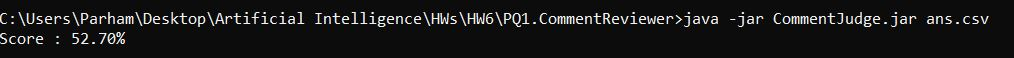